In [7]:
%load_ext autoreload
%autoreload 2

import smart_import
import numpy as np
from pylab import *


from quanalys.acquisition_notebook import AcquisitionNotebookManager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# AcquisitionManager and AnalysisManager

In [2]:
AQM = AcquisitionNotebookManager("..\\tmp_data\\")
# Creates (or loads) the temporary json file ...\measurements\Cooldown_2022_12_12_die5_Gflux_22_CEA_v1\\quanalysis_tmp.json

AQM.set_config_file("dummy_config1.txt", "dummy_config2.txt")
# A snapshot of all files in this list will be backed-up with the data.

# Example 1: acquisition with a blocking function

In [3]:
%%acquisition_cell simple_sine

UsageError: %%acquisition_cell is a cell magic, but the cell body is empty.


In [4]:
AQM.create_new_acquisition("simple_sine2")

AnalysisData: 
 {
    "cell": "variable of type NoneType",
    "configs": {
        "dummy_config1.txt": "variable of type str",
        "dummy_config2.txt": "variable of type str"
    }
}
mode: w

In [5]:
%%acquisition_cell simple_sine
# The code contained in this cell should be backed-up as it defines how the data are acquired:
# A snapshot of the content of this cell is registered at the execution time, for future backup

def acquire_data():
    x = np.linspace(0, 20*np.pi, 101)
    y = np.sin(x)
    return x, y

x, y = acquire_data()

AQM.save_acquisition(x=x, y=y) # Nothing can be done until the dataset is fully acquired, so in this case, the data are saved in a .h5 file, 
# and the content of this cell as well

140411755361040 ..\tmp_data\/simple_sine/2023-01-03_19-27-57_simple_sine.h5 ..\tmp_data\/simple_sine/2023-01-03_19-27-57_simple_sine.h5


analysis_cell


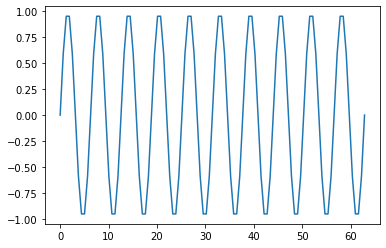

In [8]:
%%analysis_cell

fig = plt.figure()
plt.plot(AQM.data.x, AQM.data.y)

AQM.save_fig(fig)
## when AQM.save_fig is called:
## 1. the figure will be save in pdf in the acquisition folder (eventually the previous version 
## will be overwriten if no new name is provided).
## 2. The current analysis_cell will be saved (eventually overwritten) in the acquisition folder


# Example 2: acquisition with a standalone platform (e.g. Quantum Machine)

In [9]:
%%acquisition_cell sine_qm

# The code contained in this cell is important as it defines how the data are acquired.

def fetch_new_data():
    """
    This code mimics 
    """
    x = np.linspace(0, 20*np.pi, 101)
    y = np.sin(x)
    return x, y + np.random.random(len(x))

#submit job to the quantum machine if needed

140411755361040 ..\tmp_data\/sine_qm/2023-01-03_19-28-15_sine_qm.h5 ..\tmp_data\/sine_qm/2023-01-03_19-28-15_sine_qm.h5


analysis_cell


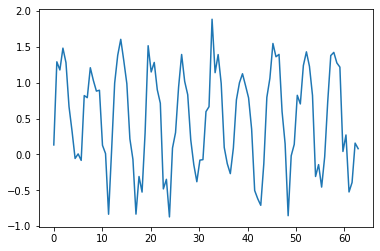

In [26]:
%%analysis_cell

# print(AQM.is_loaded_data)

# This cell might retrieve some data from a standalone acquisition platform (like a quantum machine for instance)
if not AQM.is_old_data: #not AQM.is_loaded_data
    x, y = fetch_new_data()
    AQM.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

# Actually, one should 
fig = plt.figure()
plt.plot(AQM.data.x, AQM.data.y)
AQM.save_fig(fig)

## Example 3: analysis on reloaded data

analysis_cell


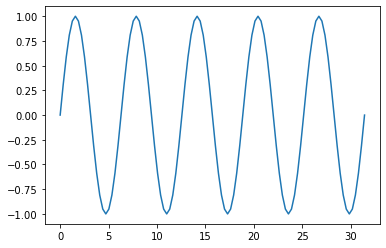

In [27]:
%%analysis_cell "../../tests/data/old_data_example"
# The name of the h5 file is sufficient if it is located in the current data_path. Otherwise, a fullpath can be provided.

if not AQM.is_old_data: # when an h5 file is specified above, then data should not be fetched anymore
    x, y = fetch_new_data()
    AQM.save_acquisition(x=x, y=y) # doesn't need to be called in the same cell as %%acquisition_cell
    # in fact, the kernel could have been restarted in the meantime (as long as x and y are retrieved somehow)

fig = plt.figure()
plt.plot(AQM.data.x, AQM.data.y)
AQM.save_fig(fig) # even with loaded data, the analysis script and figures are overwritten